In [45]:
import numpy as np
import seaborn as sns

In [125]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<Axes: >

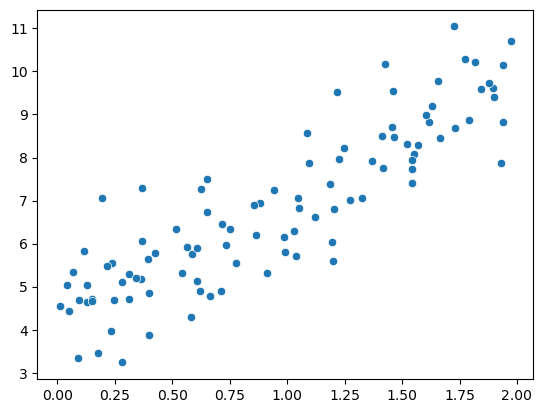

In [47]:
sns.scatterplot(x=X.flatten(), y=y.flatten())

In [48]:
w = 0
b = 0
learning_rate = 0.01
iterations = 1000
_lambda = 0.1 

In [49]:
def cost_function(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [50]:
prev_cost = None
new_cost = None
cost_history = []

In [51]:
while prev_cost is None or abs(new_cost - prev_cost) > 0.001:
    m = len(y)
    predictions = X.dot(w) + b
    prev_cost = new_cost
    new_cost = cost_function(X, y, w, b)
    cost_history.append(new_cost)
    d_dw = (1/m) * np.sum((predictions - y) * X) + (_lambda/m) * w
    d_db = (1/m) * np.sum(predictions - y)
    w = w - (learning_rate * d_dw)
    b = b - (learning_rate * d_db)

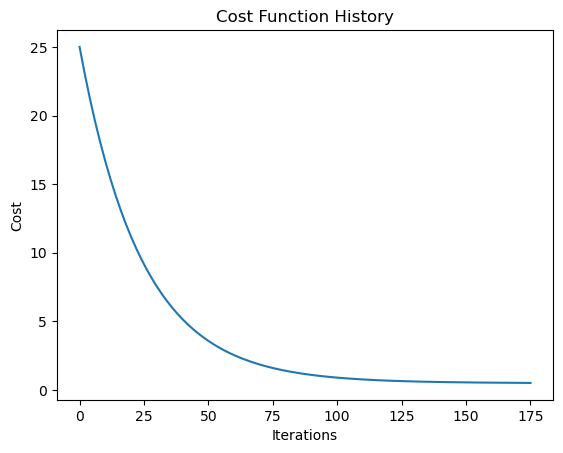

In [52]:
# plot the cost function history
import matplotlib.pyplot as plt
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [53]:
predictions = X.dot(w) + b

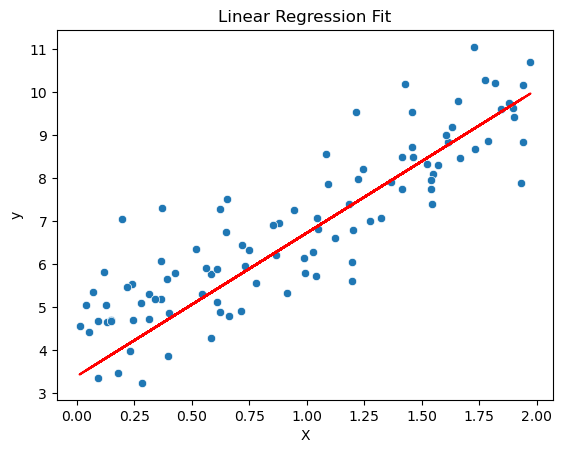

In [54]:
# plot the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()

In [99]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, epsilon=1e-6, _lambda=0, max_iter=1000000):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self._lambda = _lambda
        self.max_iter = max_iter
        self.w = None
        self.b = 0
        
    def _cost_function(self, X, y, w, b):
        m = len(y)
        predictions = X.dot(w) + b
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        y = y.ravel()
        prev_cost = None
        new_cost = None
        
        for _ in range(self.max_iter):
            prev_cost = new_cost
            new_cost = self._cost_function(X, y, self.w, self.b)
            
            if prev_cost is not None and  abs(new_cost - prev_cost) <= self.epsilon:
                break
            
            m = len(y)
            predictions = X.dot(self.w) + self.b
            error = predictions - y
                
            for j in range(X.shape[1]):
                d_dw = (1/m) * np.sum(error * X[:,j]) + ((self._lambda/m) * self.w[j])
                self.w[j] -= (self.learning_rate * d_dw)
            d_db = 1/m * np.sum(error)
            self.b -= (self.learning_rate * d_db)
            
    def predict(self, X):
        predictions = X.dot(self.w) + self.b
        return predictions

In [133]:
np.random.seed(42)
X = np.random.rand(100, 2)
true_w = np.array([2, -3])
y = X.dot(true_w) + 5 + np.random.randn(100) * 0.2 


In [134]:
model = LinearRegression(learning_rate=0.01)
model.fit(X, y)

print("Weights:", model.w)
print("Bias:", model.b)

Weights: [ 2.13655181 -2.79796404]
Bias: 4.851956071154819


In [135]:
y_pred = model.predict(X)

In [136]:
mse = np.mean((y - y_pred) ** 2)
print("MSE:", mse)

MSE: 0.04105008583268


In [137]:
print("Min y:", y.min())
print("Max y:", y.max())
print("RMSE:", np.sqrt(mse))


Min y: 2.2262060162879793
Max y: 6.43794985674211
RMSE: 0.20260820771301444
